<a href="https://colab.research.google.com/github/sdam-au/PHI_ETL/blob/master/scripts/1_4_MODELLING_DATES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements & Auth



In [2]:
import requests
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# our own package for reading the data
import sddk

In [3]:
# read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [4]:
# login to sciencedata 
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [5]:
# read the PHI dataset from sciencedata.dk
# (takes some time - the dataset has almost 400MB)
PHI = sddk.read_file("SDAM_data/PHI/PHI_dated_lemmatized_20201023.json", "df", conf)
# older version used during development: PHI = sddk.read_file("SDAM_data/PHI/PHI_enriched_raw.json", "df", conf)
# print first 5 rows of the data
PHI.head(5)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata,data,...,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,lemmata,string_normalized
0,https://epigraphy.packhum.org/text/1,IG I³,1,Regions\n\nAttica (IG I-III)Attica,None,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,None,12.0,\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,...,c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,"[ἔδοχσεν, τοῖος, δέμοι, τός, Σαλαμίς, κλερόχος...",ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...
1,https://epigraphy.packhum.org/text/2,IG I³,2,Regions\n\nAttica (IG I-III)Attica,None,Att. — non-stoich. — c. 500 a.,None,14.0,\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,...,c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,"[βολ, ℎεκον, θεός, γνοσθει, ἀτεχνος, μεδέ, ℎαμ...",ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...
2,https://epigraphy.packhum.org/text/3,IG I³,3,Regions\n\nAttica (IG I-III)Attica,None,Att. — stoich. 21 — 490-480 a.,None,13.0,\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,...,490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,"[ἀρίς, ℎερακλειο, ἀρόω, τίθημι, τός, ἀθλοθέτης...",αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...
3,https://epigraphy.packhum.org/text/4,IG I³,4,Regions\n\nAttica (IG I-III)Attica,None,Att. — stoich. 38 — 485/4 a.,None,58.0,\nface A.1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,...,485/4 a.,"{'or': None, 'not_before': -485, 'not_after': ...",-485.0,-484.0,None,[range],None,None,"[ἄναξ, φροράν, πεντέκοντα, δραχμή, ἵημι, πρᾶχσ...",ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...
4,https://epigraphy.packhum.org/text/5,IG I³,5,Regions\n\nAttica (IG I-III)Attica,None,Att. — c. 500 a.\n\nSee also:\nI.Eleusis 13,None,6.0,\n1\n\n\n\n \n5\n\n,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,...,c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,"[ἔδοχσεν, τει, βολει, τοῖος, δέμοι, ℎότε, παρα...",ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...


In [6]:
### how many of the inscriptions have at least one date
len(PHI[(PHI["not_before"].notnull()) | (PHI["not_after"].notnull())])

130533

# Generate random dates for the whole dataset

In [6]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
PHI["random_dates"] = PHI.apply(lambda row: model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 1min 41s, sys: 3.78 s, total: 1min 45s
Wall time: 1min 45s


In [7]:
PHI.head(20)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata,data,filename,PHI_ID,hdr1_scrape,hdr2_scrape,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,random_dates
0,https://epigraphy.packhum.org/text/1,IG I³,1,Regions\n\nAttica (IG I-III)Attica,None,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,None,12.0,\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I-3.csv,1,Regions\nAttica (IG I-III)Attica,IG I³\n1,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,"[-506, -500, -507, -504, -511, -508, -499, -50..."
1,https://epigraphy.packhum.org/text/2,IG I³,2,Regions\n\nAttica (IG I-III)Attica,None,Att. — non-stoich. — c. 500 a.,None,14.0,\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I-3.csv,2,Regions\nAttica (IG I-III)Attica,IG I³\n2,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"․․ ․․․ν βολ ․ ․․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,"[-495, -495, -499, -502, -502, -497, -499, -50..."
2,https://epigraphy.packhum.org/text/3,IG I³,3,Regions\n\nAttica (IG I-III)Attica,None,Att. — stoich. 21 — 490-480 a.,None,13.0,\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I-3.csv,3,Regions\nAttica (IG I-III)Attica,IG I³\n3,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο․․․․ αρο τιθέναι τὸς ἀθλοθέτας τρ...,490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,"[-481, -489, -481, -487, -482, -486, -483, -48..."
3,https://epigraphy.packhum.org/text/4,IG I³,4,Regions\n\nAttica (IG I-III)Attica,None,Att. — stoich. 38 — 485/4 a.,None,58.0,\nface A.1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I-3.csv,4,Regions\nAttica (IG I-III)Attica,IG I³\n4,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․․ ․․․․․․․․․...,485/4 a.,"{'or': None, 'not_before': -485, 'not_after': ...",-485.0,-484.0,None,[range],None,None,"[-485, -485, -484, -485, -484, -484, -484, -48..."
4,https://epigraphy.packhum.org/text/5,IG I³,5,Regions\n\nAttica (IG I-III)Attica,None,Att. — c. 500 a.\n\nSee also:\nI.Eleusis 13,None,6.0,\n1\n\n\n\n \n5\n\n,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,IG-I-3.csv,5,Regions\nAttica (IG I-III)Attica,IG I³\n5,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,ἔδοχσεν ⋮ τε͂ι βολε͂ι ⋮ καὶ το͂ι δέμοι ⋮ ℎότε ...,c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,"[-501, -498, -497, -498, -501, -499, -498, -49..."
5,https://epigraphy.packhum.org/text/6,IG I³,6,Regions\n\nAttica (IG I-III)Attica,None,Att. — stoich. 23/11 — ante 460 a.\n\nSee also...,None,168.0,\nface A.BM 309.1\n\n\n\n\n5\n\n\n\n\n\n10\n\n...,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,IG-I-3.csv,6,Regions\nAttica (IG I-III)Attica,IG I³\n6,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,․․․․․․․․․․․․․ δραχμε͂ισι ․․․․․․․․․․․․τες τὸς ι...,ante 460 a.,"{'or': None, 'not_before': None, 'not_after': ...",NaN,-461.0,None,[ante],None,None,"[-491, -473, -470, -483, -488, -463, -486, -46..."
6,https://epigraphy.packhum.org/text/7,IG I³,7,Regions\n\nAttica (IG I-III)Attica,None,Att. — stoich. 40 — 460-450,None,29.0,\nfrg. a.1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n1...,[ἔδοχσεν τε͂]ι βο[λ]ε͂[ι καὶ 

# PHI dataset overview

In [7]:
len(PHI)

216702

In [9]:
len(PHI[PHI["random_dates"].notna()])

130533

In [8]:
# how many are dated / generated random numbers
len(PHI[PHI["random_dates"].notna()]) / len(PHI)

0.6023617686961819

In [160]:
len(PHI[(PHI["not_before"] >= -800) & (PHI["not_before"] <= 400)])

124061

In [48]:
# post quem
post = PHI[PHI["not_before"].notna() & (PHI["not_after"].isna())]
len(post)

3678

In [49]:
# ante quem
ante = PHI[PHI["not_after"].notna() & (PHI["not_before"].isna())]
len(ante)

806

In [175]:
ranges = PHI[PHI["not_after"].notna() & (PHI["not_before"].notna())]
len(ranges)

126049

In [177]:
# just for checking...
len(ranges) + len(ante) + len(post)

130533

In [37]:
def get_duration(start, stop):
  try:
    duration = abs(int(start) - int(stop)) + 1
    if 0 in range(int(start),  int(stop)):
      duration = duration - 1
  except:
    duration = np.nan
  return duration
  

PHI["duration"] = PHI.apply(lambda row: get_duration(row["not_before"], row["not_after"]), axis=1)

In [71]:
get_duration(-146, 324)

470

In [72]:
get_duration(-31, 410)

441

In [42]:
len(PHI[PHI["duration"] > 100])

41096

In [46]:
len(PHI[PHI["duration"] == 100])

26956

In [69]:
len(PHI[PHI["duration"] == 200])

19068

In [44]:
len(PHI[PHI["duration"] <= 100])

84953

In [41]:
len(PHI[PHI["duration"] <= 10])

22922

In [73]:
len(PHI[PHI["duration"] <= 50])

49620

Text(0.5, 1.0, '')

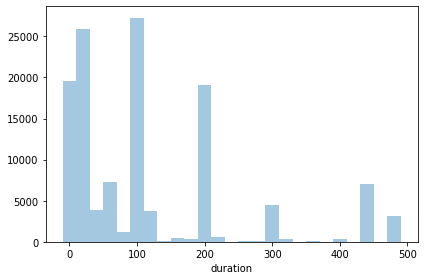

In [67]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.distplot(PHI["duration"], kde=False, bins=range(-10, 510,20), ax=ax)
ax.set_title("")

In [68]:
sddk.write_file("SDAM_data/temporal_uncertainty/ranges_hist.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/temporal_uncertainty/ranges_hist.png"


# Simulations with complete dataset

In [92]:
%%time
PHI_complete_simulations = timeblocks_from_randoms(PHI, "random_dates", [-800, 400, 50])

CPU times: user 2min 45s, sys: 2.25 s, total: 2min 47s
Wall time: 2min 47s


In [93]:
PHI_complete_simulations[1]

[((-800, -751), 13),
 ((-750, -701), 62),
 ((-700, -651), 146),
 ((-650, -601), 260),
 ((-600, -551), 874),
 ((-550, -501), 2092),
 ((-500, -451), 3951),
 ((-450, -401), 4122),
 ((-400, -351), 6193),
 ((-350, -301), 8754),
 ((-300, -251), 8196),
 ((-250, -201), 9074),
 ((-200, -151), 8833),
 ((-150, -101), 7228),
 ((-100, -51), 4950),
 ((-50, -1), 4801),
 ((1, 50), 6198),
 ((51, 100), 6220),
 ((101, 150), 10215),
 ((151, 200), 10128),
 ((201, 250), 9163),
 ((251, 300), 5814),
 ((301, 350), 3108),
 ((351, 400), 2689)]

In [90]:
def desc_stat_from_simulations(simulations):
  tups_desc = []
  for n in range(len(simulations[0])):
    values = [sim[n][1] for sim in simulations]
    tups_desc.append((simulations[0][n][0], np.min(values), np.max(values), np.mean(values), np.median(values)))
  tups_desc_df = pd.DataFrame(tups_desc)
  tups_desc_df.columns = ["temp_block", "min", "max", "mean", "median"]
  return tups_desc_df

In [95]:
sims_by_blocks = desc_stat_from_simulations(PHI_complete_simulations)
sims_by_blocks.set_index("temp_block", inplace=True)
sims_by_blocks

,min,max,mean,median
temp_block,,,,
"(-800, -751)",6,18,11.543,11.0
"(-750, -701)",44,65,55.946,56.0
"(-700, -651)",134,187,161.582,162.0
"(-650, -601)",231,298,259.824,260.0
"(-600, -551)",815,951,882.957,883.0
"(-550, -501)",1975,2133,2056.133,2057.0
"(-500, -451)",3836,4058,3941.470,3942.0
"(-450, -401)",4000,4219,4113.202,4113.0
"(-400, -351)",6081,6356,6216.112,6215.0


In [18]:
from pandas.plotting import table

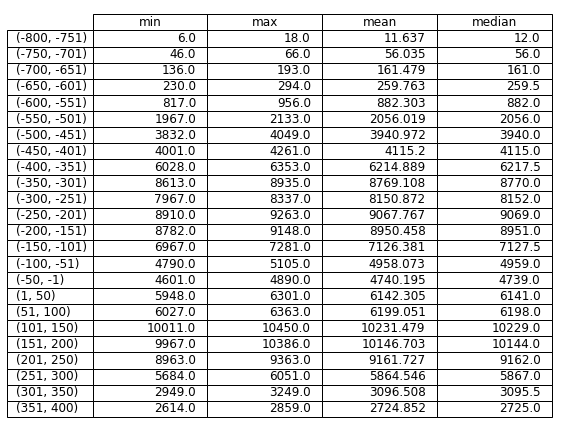

In [139]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)
tabla = table(ax, sims_by_blocks, loc='upper right', colWidths=[0.2]*len(sims_by_blocks.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) 

In [140]:
sddk.write_file("SDAM_data/temporal_uncertainty/sims_by_blocks.png", fig, conf)

A file with the same name ("sims_by_blocks.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/temporal_uncertainty/sims_by_blocks.png"


In [17]:
sddk.write_file("SDAM_data/temporal_uncertainty/sims_by_blocks.csv", sims_by_blocks, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/temporal_uncertainty/sims_by_blocks.csv"


In [141]:
# compare in how many instances is there less inscriptions for the first half of the 2nd c. than for the second half.
len([sim for sim in PHI_complete_simulations if sim[18][1] < sim[19][1]])

214

In [148]:
len([date for date in PHI_date_avr if not np.isnan(date)])

126049

# Generate average dates
(for comparison)

In [87]:
# for a comparison, generate dates based on average values
def get_avr(row):
  try: 
    avr = int(np.round(np.mean([row["not_before"], row["not_after"]])))
  except:
    avr = np.nan
  return avr

PHI["date_avr"] = PHI.apply(lambda row: get_avr(row), axis=1)

#PHI_avr_blocks_ = dates_per_block(PHI_date_avr, sims_by_blocks.index.tolist())

In [84]:
len(PHI[PHI["date_avr"].notna()])

126049

In [88]:
print(PHI["date_avr"].tolist()[:100])

[-505.0, -500.0, -485.0, -484.0, -500.0, nan, -455.0, -455.0, -458.0, -460.0, nan, -432.0, -458.0, -452.0, -450.0, -450.0, -450.0, -450.0, -450.0, -450.0, -450.0, -450.0, -447.0, -450.0, -450.0, -450.0, -450.0, -445.0, -450.0, -450.0, -450.0, -448.0, -448.0, -448.0, -448.0, -424.0, -446.0, -451.0, -446.0, -446.0, -446.0, -444.0, -431.0, -448.0, -445.0, -445.0, -432.0, -438.0, -435.0, -436.0, -435.0, -430.0, -434.0, -432.0, -432.0, -431.0, -430.0, -430.0, -430.0, -430.0, -430.0, -424.0, -428.0, -426.0, -425.0, -426.0, -426.0, -426.0, -426.0, -426.0, -425.0, -424.0, -414.0, -417.0, -424.0, -424.0, -422.0, -422.0, nan, nan, -422.0, -420.0, -420.0, -420.0, -420.0, -418.0, -418.0, -416.0, -425.0, -425.0, -415.0, nan, -416.0, -416.0, -415.0, -415.0, -414.0, -412.0, -412.0, -411.0]


In [100]:
avr_by_block = dates_per_block(PHI["date_avr"], sims_by_blocks.index.tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in less_equal


In [107]:
avr_by_block_df = pd.DataFrame(avr_by_block)
avr_by_block_df.columns = ["temp_block", "count"]
avr_by_block_df

,temp_block,count
0,"(-800, -751)",6
1,"(-750, -701)",48
2,"(-700, -651)",63
3,"(-650, -601)",307
4,"(-600, -551)",397
5,"(-550, -501)",1680
6,"(-500, -451)",3855
7,"(-450, -401)",4450
8,"(-400, -351)",3103
9,"(-350, -301)",9808


Text(0.5, 1.0, 'Dates based on averages vs simulations')

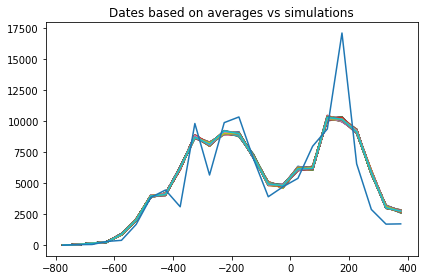

In [120]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
plot_timeblocks_data(PHI_complete_simulations, ax)
x = [np.mean(tup) for tup in avr_by_block_df["temp_block"]]
y = avr_by_block_df["count"]
ax.plot(x, y)
ax.set_title("Dates based on averages vs simulations")

In [121]:
sddk.write_file("SDAM_data/temporal_uncertainty/avr_vs_simulations.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/temporal_uncertainty/avr_vs_simulations.png"


# Regions

In [114]:
regions = ["Aegean Islands",
 "Asia Minor",
 "Attica",
 "Central Greece",
 "Northern Greece",
 "Cyprus",
 "Egypt, Nubia and Cyrenaïca",
 "Greater Syria and the East",
 "North Shore of the Black Sea",
 "Peloponnesos",
 "Sicily, Italy, and the West",
 "Thrace and the Lower Danube",
 "Upper Danube",
  "North Africa"]

In [115]:
for region in regions:
  print(region, len(PHI[PHI["hdr1"].str.contains(region)]))

Aegean Islands 29444
Asia Minor 50226
Attica 32652
Central Greece 18582
Northern Greece 10715
Cyprus 4590
Egypt, Nubia and Cyrenaïca 14044
Greater Syria and the East 11028
North Shore of the Black Sea 4780
Peloponnesos 7968
Sicily, Italy, and the West 16201
Thrace and the Lower Danube 14627
Upper Danube 1260
North Africa 583


In [181]:
PHI_attica = PHI[PHI["hdr1"].str.contains("Attica")]
len(PHI_attica)

32652

In [182]:
PHI_asia_minor = PHI[PHI["hdr1"].str.contains("Asia Minor")]
len(PHI_asia_minor)

50226

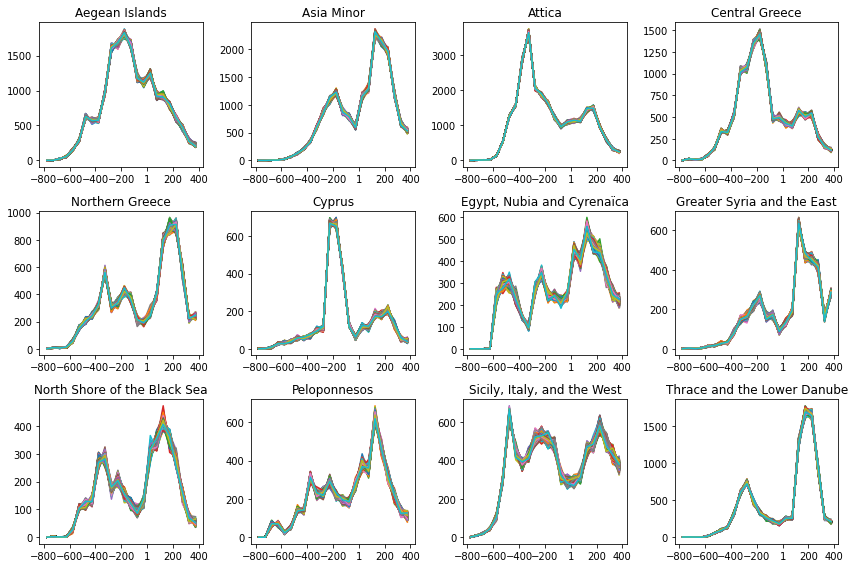

In [117]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), tight_layout=True)

for ax, region in zip(axs.ravel(), regions[:12]):
  region_df = PHI[PHI["hdr1"].str.contains(region)]
  region_sim = timeblocks_from_randoms(region_df,  "random_dates", [-800, 400, 50])
  plot_timeblocks_data(region_sim, ax=ax)
  ax.set_xticks([-800, -600, -400, -200, 1, 200, 400])
  ax.set_title(region)

In [118]:
sddk.write_file("SDAM_data/temporal_uncertainty/regions_sims.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/temporal_uncertainty/regions_sims.png"
